# Setup Table for Visualization

In [15]:
import pandas as pd
import math

# Column names
my_cols=['tmstmp', 'px_st', 'py_st', 'v_st', 'yaw_st', 'yaw_rt_st', 'sensor', 'NIS', 'px_meas', 'py_meas', 'px_gt', 'py_gt', 'vx_gt', 'vy_gt', 'px_est', 'py_est', 'vx_est', 'vy_est']
with open('output.txt') as f:
    table_ukf_output = pd.read_table(f, sep='\t', header=None, names=my_cols, lineterminator='\n')
    


# Sneak Peak into the Data

In [16]:
# check the parsed file
table_ukf_output[1:5]

,tmstmp,px_st,py_st,v_st,yaw_st,yaw_rt_st,sensor,NIS,px_meas,py_meas,px_gt,py_gt,vx_gt,vy_gt,px_est,py_est,vx_est,vy_est
1,1477010443000000,0.312243,0.58034,0,0,0,lidar,0,0.312243,0.58034,0.6,0.6,5.19994,0,0.312243,0.58034,0,0
2,1477010443050000,0.573656,0.466764,4.29481,-2.15916e-17,-7.33674e-18,radar,44.7308,0.862916,0.534212,0.859997,0.600045,5.19975,0.00179686,0.573656,0.466764,4.29481,-9.27318e-17
3,1477010443100000,1.15251,0.492244,4.3115,-0.061075,-0.00570407,lidar,0.00180047,1.17385,0.481073,1.11998,0.600225,5.19943,0.00538996,1.15251,0.492244,4.30346,-0.263161
4,1477010443150000,1.33839,0.521589,4.49394,0.351404,0.0651717,radar,1.22104,0.969149,0.397513,1.37996,0.600629,5.19898,0.0107781,1.33839,0.521589,4.21932,1.54689


# Plot NIS for Lidar and Radar

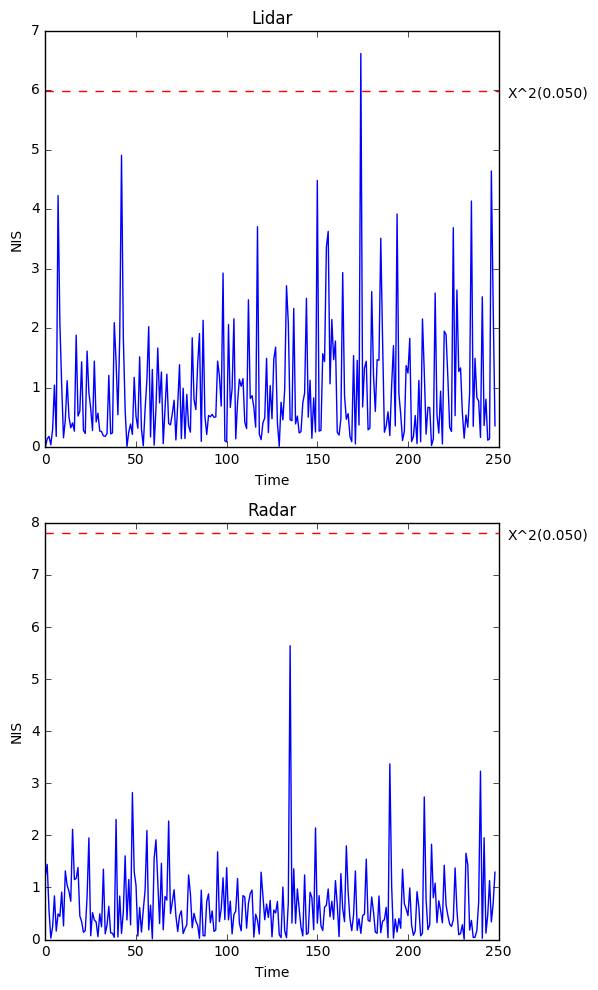

In [68]:
import numpy as np
import matplotlib.pyplot as plt

NISDF = pd.DataFrame(table_ukf_output)

fig = plt.figure(figsize=(10,10))

# Lidar NIS data
NISLidarDF = NISDF[NISDF['sensor'] == 'lidar']
NISLidar = NISLidarDF['NIS']
NISLidar = np.array(NISLidar[1:len(NISLidar)])
NISLidar = NISLidar.astype(float)

timestamp = np.arange(0, len(NISLidar))
ax_lidar = fig.add_subplot(221)
ax_lidar.plot(timestamp, NISLidar)
ax_lidar.axhline(y=5.99, color='r', linestyle='dashed')
ax_lidar.set_title("Lidar")
ax_lidar.set_xlabel("Time")
ax_lidar.annotate('X^2(0.050)', xy=(0, 5.99), xytext=(255, 5.88))
ax_lidar.set_ylabel("NIS")

# Radar NIS data
NISRadarDF = NISDF[NISDF['sensor'] == 'radar']
NISRadar = NISRadarDF['NIS']
NISRadar = np.array(NISRadar[1:len(NISRadar)])
NISRadar = NISRadar.astype(float)

timestamp = np.arange(0, len(NISRadar))
ax_radar = fig.add_subplot(223)
ax_radar.plot(timestamp, NISRadar)
ax_radar.axhline(y=7.81, color='r', linestyle='dashed')
ax_radar.set_title("Radar")
ax_radar.set_xlabel("Time")
ax_radar.set_ylabel("NIS")
ax_radar.annotate('X^2(0.050)', xy=(0, 7.81), xytext=(255, 7.70))
plt.tight_layout()
plt.show()

# Plot Position measured v/s ground truth v/s estimated values

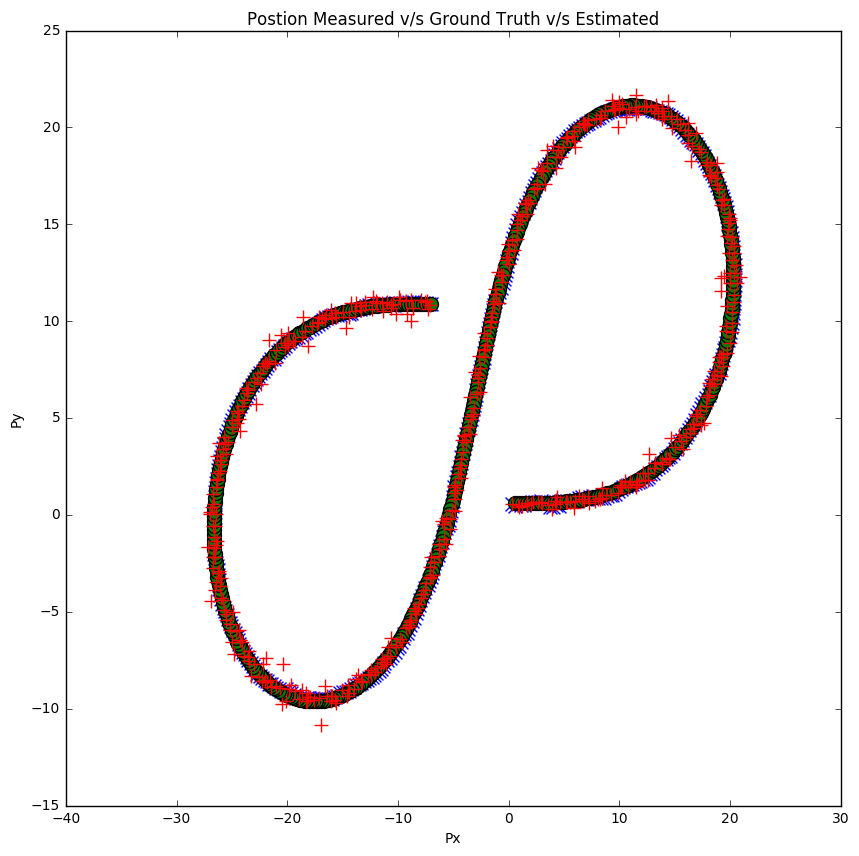

In [113]:
# Px and Py measured
NISPxM = NISDF['px_meas']
NISPxM = np.array(NISPxM[1:len(NISPxM)])
NISPxM = NISPxM.astype(float)
NISPyM = NISDF['py_meas']
NISPyM = np.array(NISPyM[1:len(NISPyM)])
NISPyM = NISPyM.astype(float)

# Px and Py ground truth
NISPxG = NISDF['px_gt']
NISPxG = np.array(NISPxG[1:len(NISPxG)])
NISPxG = NISPxG.astype(float)
NISPyG = NISDF['py_gt']
NISPyG = np.array(NISPyG[1:len(NISPyG)])
NISPyG = NISPyG.astype(float)

# Px and Py estimated
NISPxE = NISDF['px_est']
NISPxE = np.array(NISPxE[1:len(NISPxE)])
NISPxE = NISPxE.astype(float)
NISPyE = NISDF['py_est']
NISPyE = np.array(NISPyE[1:len(NISPyE)])
NISPyE = NISPyE.astype(float)                       
                       
# Plot the different points
fig = plt.figure(figsize=(10,10))
ax_M = fig.add_subplot(111)
ax_M.scatter(NISPxE, NISPyE, c='b', marker='x', s=100)
ax_M.scatter(NISPxG, NISPyG, c='g', marker='o', s=100)
ax_M.scatter(NISPxM, NISPyM, c='r', marker='+', s=100)
ax_M.set_title("Postion Measured v/s Ground Truth v/s Estimated")
ax_M.set_xlabel("Px")
ax_M.set_ylabel("Py")
plt.show()

# Plot Velocity ground truth v/s estimated values

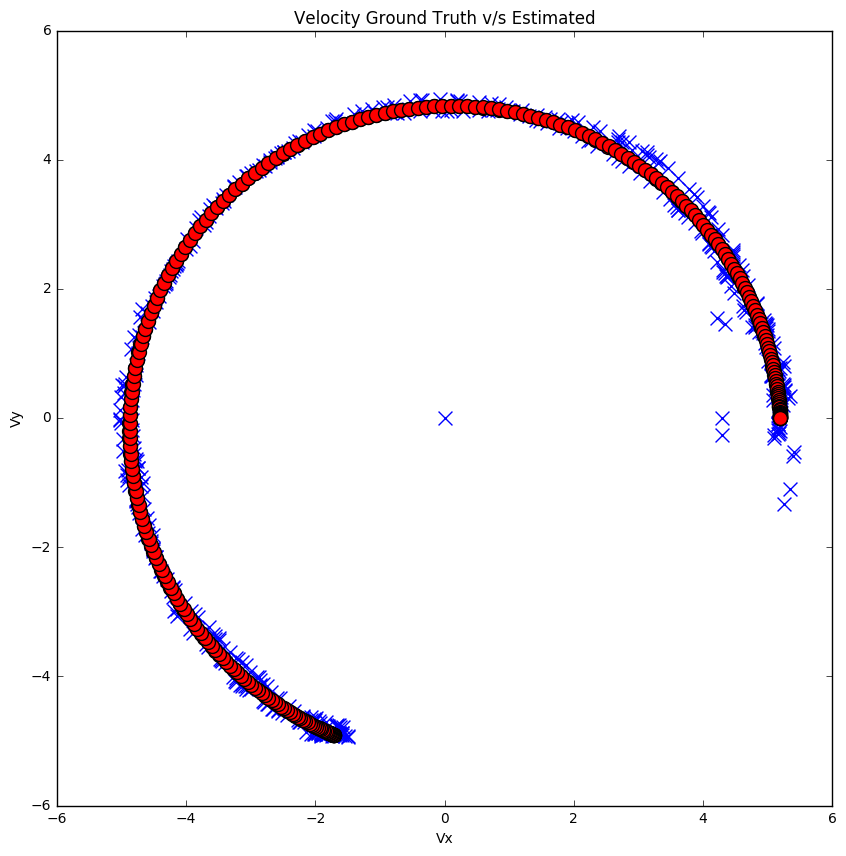

In [114]:
# Vx and Vy ground truth
NISVxG = NISDF['vx_gt']
NISVxG = np.array(NISVxG[1:len(NISVxG)])
NISVxG = NISVxG.astype(float)
NISVyG = NISDF['vy_gt']
NISVyG = np.array(NISVyG[1:len(NISVyG)])
NISVyG = NISVyG.astype(float)

# Vx and Vy estimated
NISVxE = NISDF['vx_est']
NISVxE = np.array(NISVxE[1:len(NISVxE)])
NISVxE = NISVxE.astype(float)
NISVyE = NISDF['vy_est']
NISVyE = np.array(NISVyE[1:len(NISVyE)])
NISVyE = NISVyE.astype(float)                       
                       
# Plot the different points
fig = plt.figure(figsize=(10,10))
ax_M = fig.add_subplot(111)
ax_M.scatter(NISVxE, NISVyE, c='b', marker='x', s=100)
ax_M.scatter(NISVxG, NISVyG, c='r', marker='o', s=100)
ax_M.set_title("Velocity Ground Truth v/s Estimated")
ax_M.set_xlabel("Vx")
ax_M.set_ylabel("Vy")
plt.show()